# Iris Flower Classification

In [1]:
import seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
%matplotlib inline

In [4]:
iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


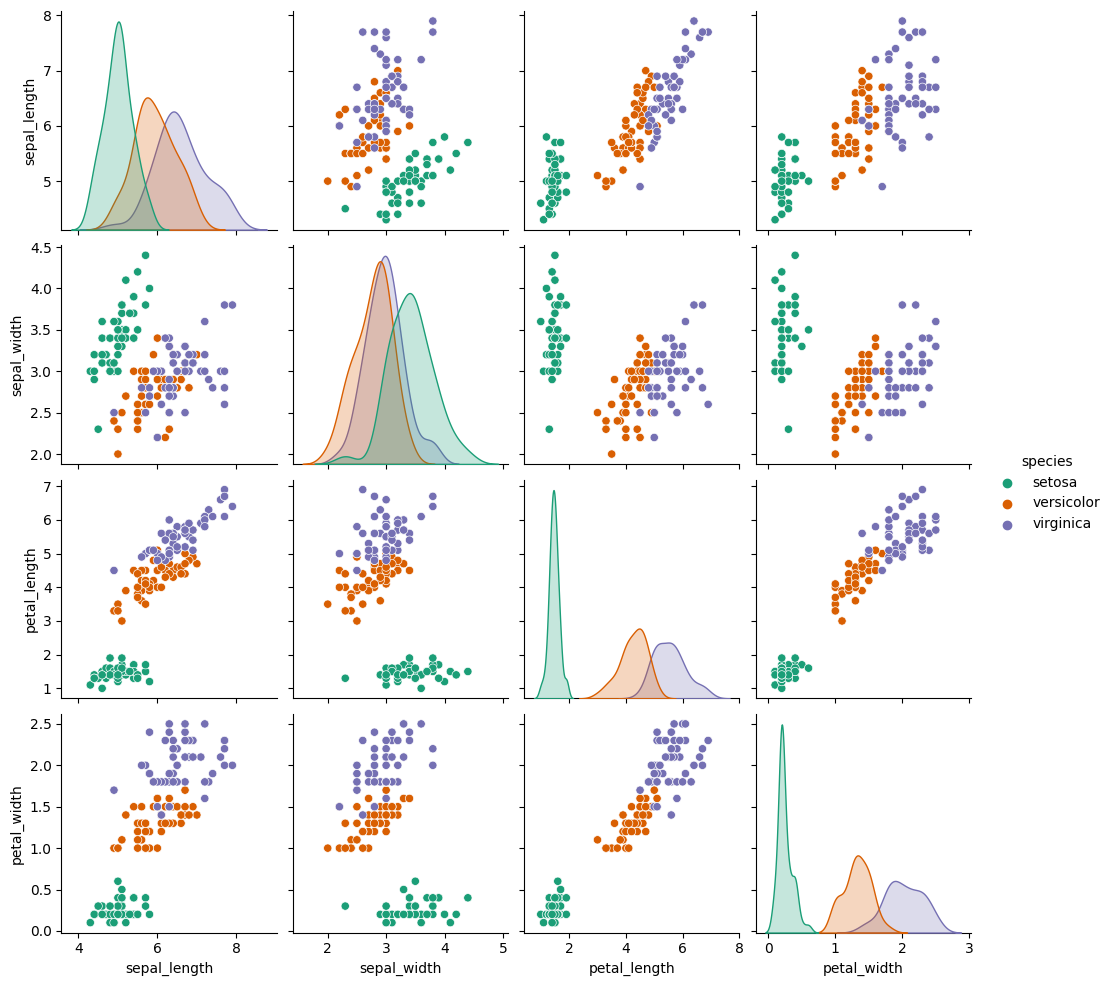

In [5]:
sns.pairplot(iris,hue='species',palette='Dark2')

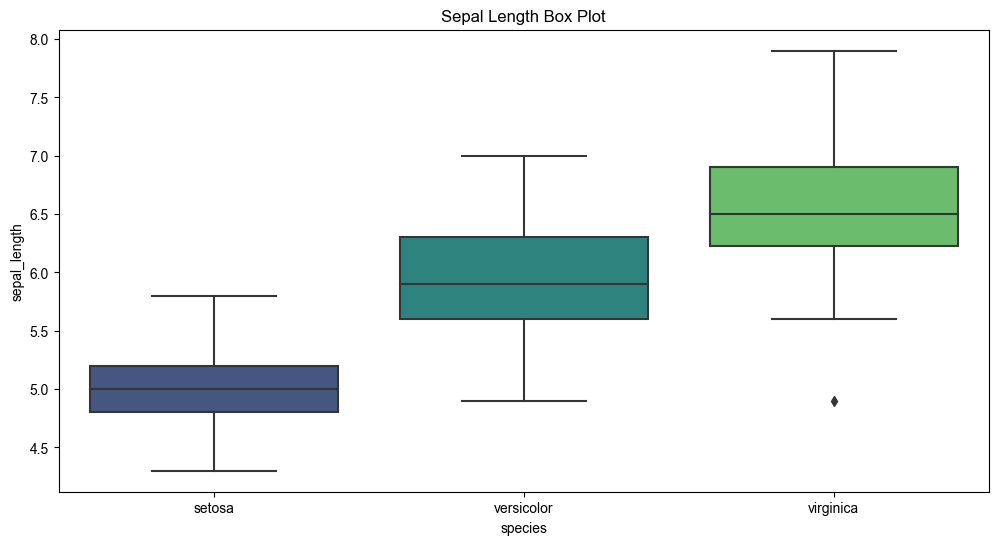

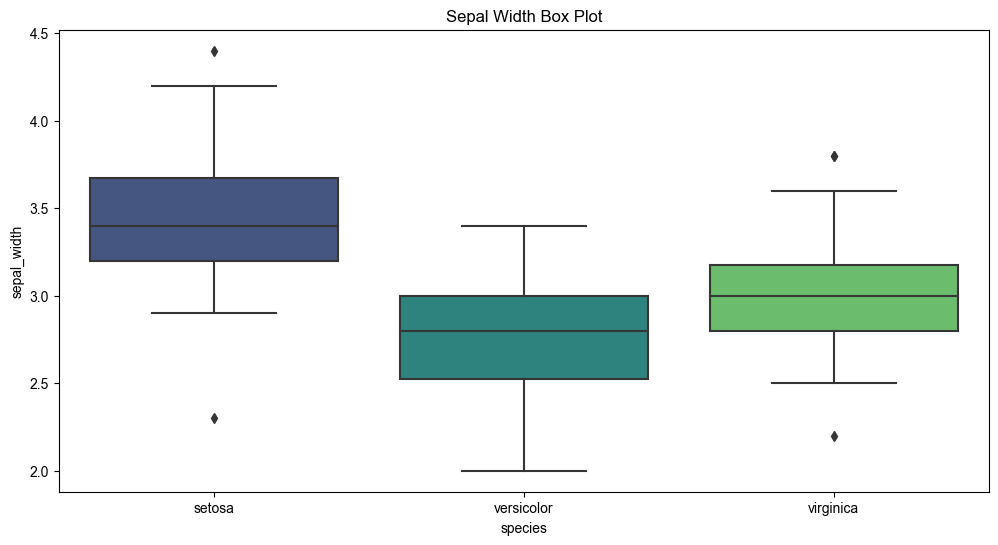

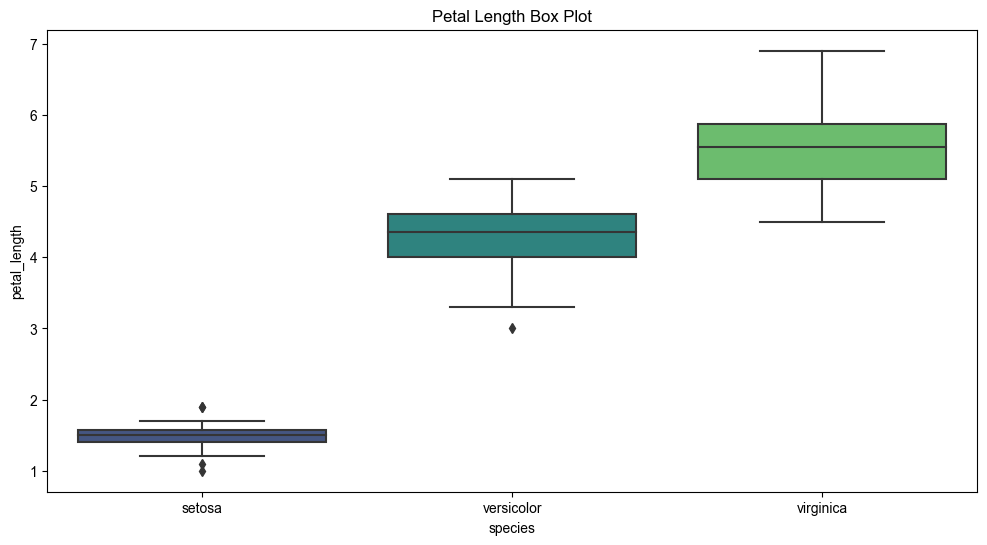

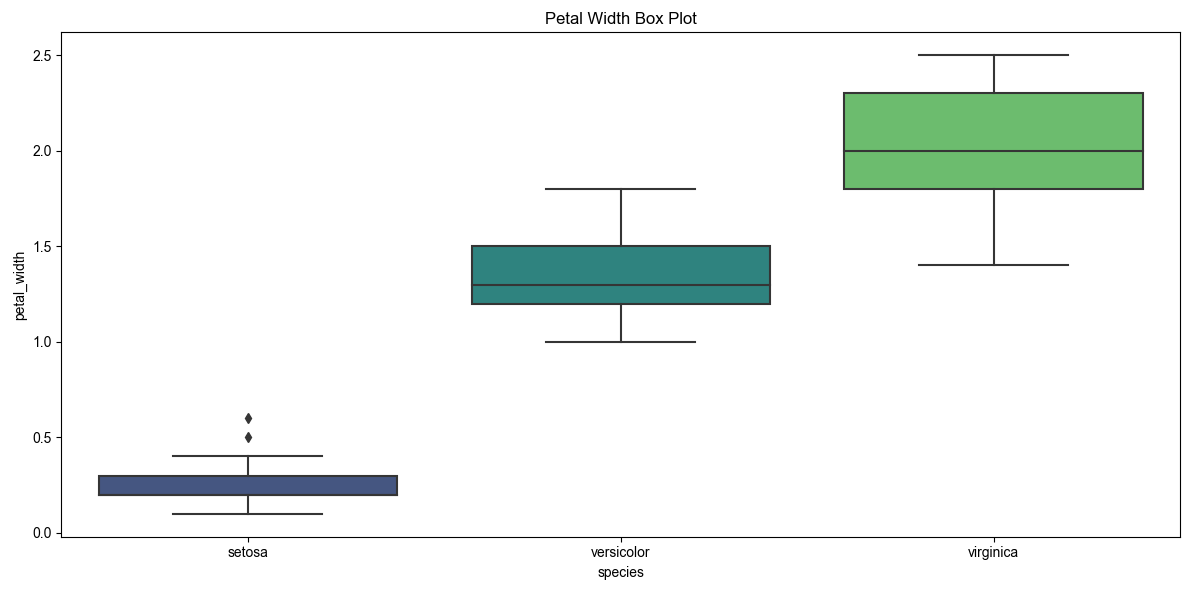

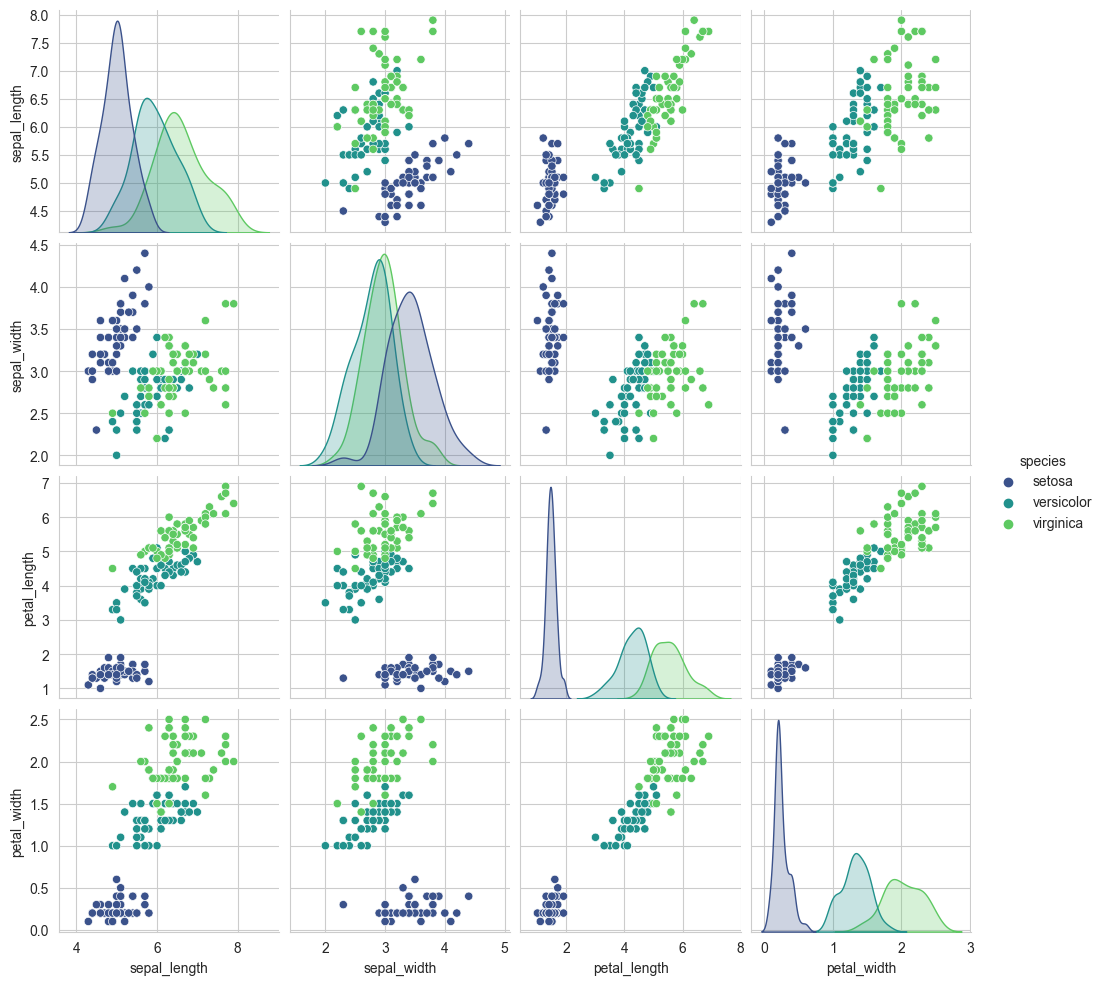

In [6]:
palette="viridis"
plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x="species", y="sepal_length", palette=palette)
plt.title("Sepal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x="species", y="sepal_width", palette=palette)
plt.title("Sepal Width Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x="species", y="petal_length", palette=palette)
plt.title("Petal Length Box Plot")

plt.figure(figsize=(12, 6))
sns.boxplot(data=iris, x="species", y="petal_width", palette=palette)
plt.title("Petal Width Box Plot")

plt.tight_layout()

sns.set_style('whitegrid')
sns.pairplot(iris, hue='species', palette="viridis")
plt.show()

# Train Test Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = iris.drop('species',axis=1)
y = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

# Model fitting

In [9]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

SVC()

In [10]:
predictions = svc_model.predict(X_test)

In [11]:
print(confusion_matrix(y_test,predictions))

[[14  0  0]
 [ 0 14  0]
 [ 0  2 15]]


In [12]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.88      0.94        17

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [13]:
print(accuracy_score(y_test, predictions))

0.9555555555555556


In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]} 

In [16]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=2)

In [17]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[14  0  0]
 [ 0 14  0]
 [ 0  0 17]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



# Test case prediction

In [18]:
X_new = np.array([[3, 2, 4, 0.2], [  4.7, 3, 1.3, 0.2 ]])
prediction = grid.predict(X_new)
print("Prediction of Species: {}".format(prediction))

Prediction of Species: ['versicolor' 'setosa']


C:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [20]:
import pickle

model_pkl_file = "iris_flower_classification_model.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(grid, file)

In [21]:
from sklearn.metrics import classification_report

In [24]:
with open(model_pkl_file, 'rb') as file:  
    model = pickle.load(file)

# evaluate model 
y_predict = model.predict(X_test)

# check results
print(classification_report(y_test,grid_predictions)) 

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       1.00      1.00      1.00        14
   virginica       1.00      1.00      1.00        17

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

